# Group Work 2: Predict marketing campaign success

# Work instructions

**Due date**: April 15 2023 (11:59 pm) => you have to send your project for Saturday end of the day.

**Deliverable**: Python notebook to be uploaded on Teams. No additional documents

**Quotations**: 36 questions / 68 points - points depending on questions - 30% of final quote (=> 6 points out of the 20 points of the final grade).

**Group composition**: Groups of 2 or 3 students maximum (it can be different from first project)

**Group composition** (it can be different from first project):

Student 1: Pierre Hosselet 

Student 2: Antoine Somerhausen

Student 3: Pacôme Van Overschelde

## Context

You have been contacted by a banking institution that is willing to leverage its data to improve its telemarketing strategy. <br>

As it wants to decrease its exposure to international credit markets, the bank decided to launch a telemarketing campaign in order to increase the amount of clients' deposits. Higher level of deposits means lower needs to borrow money on credit markets.<br> 

The bank has accumulated data from previous telemarketing campaigns and asks you to analyse it to assess whether you can predict which customers are likely to submit a new deposit. If your analysis enables to identify high potential clients, it will allow the bank to allocate its efforts on highest potential clients. <br>

In order to tackle that challenge you decided to use machine learning algorithms that you have learned in Data Management & Analytics classes.

## Data

The dataset includes information about calls that took place during previous telemarketing campaigns.

- age: age of the client
- balance: balance on the client's account (€)
- campaign: number of contacts performed during this campaign and for this client
- day: day of the month when the call took place
- default: whether the client credit in default ('yes':1, 'no':0)
- duration: last call duration
- education: client's education ('tertiary', 'secondary', 'unknown', 'primary')
- housing: whether the client has housing loan ('yes':1, 'no':0)
- loan: whether the client has personal loan ('yes':1, 'no':0)
- marital: marital status('married':1, 'not married':0)
- previous: number of contacts performed before this campaign and for this client
- poutcome: outcome of the previous marketing campaign
- subscription: whether the client subscribed to a term deposit after the call ('yes':1, 'no':0).

**Simply run the following lines to mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

**Simply run the following line to import python libraries**

In [1]:
%pip install pymongo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**IMPORTANT**: In this second project, you can use SQL or MongoDB. Some students had a problem with the free tier of MongoDB on CleverCloud, so don't hesitate to use SQL if you faced this problem.

In [1]:
import sys
import json
import pymongo
from pymongo import MongoClient, InsertOne
import matplotlib.pyplot as plt
from IPython.display import Image
from pprint import pprint
import pydotplus
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score
import csv


uri = '#####################' 
client = MongoClient(uri)

db = client["###########"]  # database name of your MongoDB CleverCloud


# A. Database MongoDB

## A.1 Creation of MongoDB table

*2 POINTS*

Create a MongoDB table called "predict_marketing_campaign" that contains the following fields (NB: it's normal that not all fields are written here):

- age (**integer**): age of the client
- job_is_employee (**integer**): is the client has a job as an employee ('yes':1, 'no':0)
- job_is_entrepreneur (**integer**): is the client has a job as an entrepreneur ('yes':1, 'no':0)
- job_is_manager (**integer**): is the client has a job as an manager ('yes':1, 'no':0)
- job_is_retired (**integer**): is the client has a job as an retired ('yes':1, 'no':0)
- job_is_student (**integer**): is the client has a job as an student ('yes':1, 'no':0)
- job_is_unemployed (**integer**): is the client has a job as an unemployed ('yes':1, 'no':0)
- marital_is_married (**integer**): is the client married ('yes':1, 'no':0)
- marital_is_single (**integer**): is the client single ('yes':1, 'no':0)
- marital_is_divorced (**integer**): is the client divorced ('yes':1, 'no':0)
- education_is_tertiary (**integer**): is the client has an tertiary education ('yes':1, 'no':0)
- education_is_secondary (**integer**): is the client has an secondary education ('yes':1, 'no':0)
- education_is_primary (**integer**): is the client has an primary education ('yes':1, 'no':0)
- education_is_unknown (**integer**): is the client has an unknown education ('yes':1, 'no':0)
- poutcome_is_failure (**integer**): is the outcome of the previous marketing campaign was a failure ('yes':1, 'no':0)
- poutcome_is_success (**integer**): is the outcome of the previous marketing campaign was a success ('yes':1, 'no':0)
- poutcome_is_unknown (**integer**): is the outcome of the previous marketing campaign was unknown ('yes':1, 'no':0)
- default (**integer**): whether the client credit in default ('yes':1, 'no':0)
- balance (**integer**): balance on the client's account (€)
- housing (**integer**): whether the client has housing loan ('yes':1, 'no':0)
- loan (**integer**): whether the client has personal loan ('yes':1, 'no':0)
- duration (**integer**): last call duration
- campaign (**integer**): number of contacts performed during this campaign and for this client
- previous (**integer**): number of contacts performed before this campaign and for this client
- subscription (**integer**): whether the client subscribed to a term deposit after the call ('yes':1, 'no':0)

It's important to note that some initial fields in the CSV file are separated into different fields:

- **job**: this variable has different values ("employee", "entrepreneur", etc.). This variable is separated into "job_is_employee", "job_is_entrepreneur", "job_is_manager", "job_is_retired", "job_is_student", "job_is_unemployed" depending on the value contained in "job".
- **marital**: this variable has different values ("married", "single", etc.). This variable is separated into "marital_is_married", "marital_is_single", "marital_is_divorced" depending on the value contained in "marital".
- **education**: this variable has different values ("primary", "secondary", etc.). This variable is separated into "education_is_tertiary", "education_is_secondary", "education_is_primary", "education_is_unknown" depending on the value contained in "education".
- **poutcome**: this variable has different values ("primary", "secondary", etc.). This variable is separated into "poutcome_is_failure", "poutcome_is_success", "poutcome_is_unknown" depending on the value contained in "poutcome".

In the end, you must have these variables in your MongoDB **with the precise types** (i.e. if a variable is said to be an integer, please transform it into an integer in DB).

In [33]:
import pandas as pd 
Header = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","subscription"]
dataframe = pd.read_csv('bank-full.csv',sep=';',header=0)

unique_values_job = dataframe.job.unique().tolist()
unique_values_marital = dataframe.marital.unique().tolist()
unique_values_poutcome = dataframe.poutcome.unique().tolist()
unique_values_education = dataframe.education.unique().tolist()
unique_values_default = dataframe.default.unique().tolist()
unique_values_housing = dataframe.housing.unique().tolist()
unique_values_loan = dataframe.loan.unique().tolist()
unique_values_subscription = dataframe.subscription.unique().tolist()


print(unique_values_job)
print(unique_values_marital)
print(unique_values_poutcome)
print(unique_values_education)
print(unique_values_default)
print(unique_values_housing)
print(unique_values_subscription)
print(unique_values_loan)

#Dictionnary of values

dic_value_job = {'management':'job_is_manager', 'technician':'job_is_employee', 'entrepreneur':'job_is_entrepreneur', 'blue-collar':'job_is_employee', 'unknown':'job_is_unemployed', 'retired':'job_is_retired', 'admin.':'job_is_employee', 'services':'job_is_employee', 'self-employed':'job_is_entrepreneur', 'unemployed':'job_is_unemployed', 'housemaid':'job_is_employee', 'student':'job_is_student'}
dic_value_marital = {'married':'marital_is_married', 'single':'marital_is_single', 'divorced':'marital_is_divorced'}
dic_value_poutcome = {'unknown':'poutcome_is_unknown', 'failure':'poutcome_is_failure', 'other':'poutcome_is_unkown', 'success':'poutcome_is_success'}
dic_value_education = {'tertiary':'education_is_tertiary', 'secondary':'education_is_secondary', 'unknown':'education_is_unknown', 'primary':'education_is_primary'}
dic_boolean_int = {'yes':1, 'no':0}


['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
['married', 'single', 'divorced']
['unknown', 'failure', 'other', 'success']
['tertiary', 'secondary', 'unknown', 'primary']
['no', 'yes']
['yes', 'no']
['no', 'yes']
['no', 'yes']


In [34]:
# Read the CSV file and write the different fields in the "table" variable in MongoDB.

csv_file = 'bank-full.csv'
DictReaderObj = csv.DictReader(open(csv_file, newline=''),delimiter=';', quotechar='"')
ListOfRecord = []
for line_csv in DictReaderObj:
    TempDic = {}

    TempDic['job_is_employee'] = 0
    TempDic['job_is_entrepreneur'] = 0
    TempDic['job_is_manager'] = 0
    TempDic['job_is_retired'] = 0
    TempDic['job_is_student'] = 0
    TempDic['job_is_unemployed']  =0
    TempDic['marital_is_married'] = 0
    TempDic['marital_is_single'] = 0
    TempDic['marital_is_divorced'] = 0                  #We set all values by default to 0
    TempDic['education_is_tertiary'] = 0
    TempDic['education_is_secondary'] = 0
    TempDic['education_is_primary'] = 0
    TempDic['education_is_unknown'] = 0
    TempDic['poutcome_is_failure'] = 0
    TempDic['poutcome_is_success '] = 0
    TempDic['poutcome_is_unknown'] = 0

    TempDic[dic_value_job[str(line_csv['job'])]]= 1
    TempDic[dic_value_marital[str(line_csv['marital'])]]= 1                 #We set to 1 the right type of job,
    TempDic[dic_value_education[str(line_csv['education'])]]= 1               # using dictionnary defined earlier
    TempDic[dic_value_poutcome[str(line_csv['poutcome'])]]= 1

    
    TempDic['age'] = int(line_csv['age'])
    TempDic['default'] = dic_boolean_int[str(line_csv['default'])]
    TempDic['balance'] = int(line_csv['balance'])
    TempDic['housing'] = dic_boolean_int[str(line_csv['housing'])]
    TempDic['loan'] = dic_boolean_int[str(line_csv['loan'])]
    TempDic['duration'] = int(line_csv['duration'])
    TempDic['campaign'] = int(line_csv['campaign'])
    TempDic['previous'] = int(line_csv['previous'])
    TempDic['subscription'] = dic_boolean_int[str(line_csv['subscription'])]
    
    ListOfRecord.append(TempDic)
    

In [37]:
#Efficient way to insert all the record at once
db['Client_Data_Base'].insert_many(ListOfRecord)

In [35]:
#db['Client_Data_Base'].drop()

## A.2 Print the number of documents in the table, and print **one** entry of the table.

*1 POINT*

In [38]:
# print the number of documents

nb_documents = db['Client_Data_Base'].count_documents({})
print(nb_documents)

45211


In [3]:
# print one entry of the table

r = db['Client_Data_Base'].find_one()

pprint(r)

{'_id': ObjectId('64492032f30935635fab916e'),
 'age': 58,
 'balance': 2143,
 'campaign': 1,
 'default': 0,
 'duration': 261,
 'education_is_primary': 0,
 'education_is_secondary': 0,
 'education_is_tertiary': 1,
 'education_is_unknown': 0,
 'housing': 1,
 'job_is_employee': 0,
 'job_is_entrepreneur': 0,
 'job_is_manager': 1,
 'job_is_retired': 0,
 'job_is_student': 0,
 'job_is_unemployed': 0,
 'loan': 0,
 'marital_is_divorced': 0,
 'marital_is_married': 1,
 'marital_is_single': 0,
 'poutcome_is_failure': 0,
 'poutcome_is_success ': 0,
 'poutcome_is_unknown': 1,
 'previous': 0,
 'subscription': 0}


You should have similar results when you print one entry of the table if you used MongoDB:

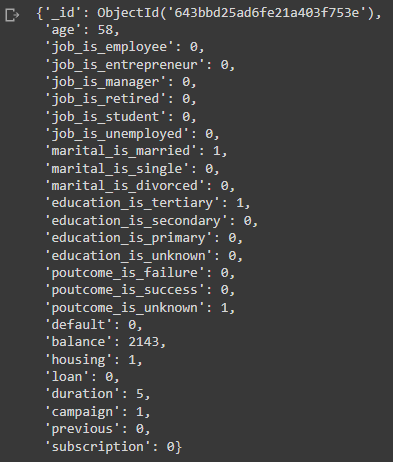

# B. Data Exploration

## B.1 Which variable will you use as output value to perform the supervised learning task?

*1 POINT*

Just name it.

Give your answer here:
 
- Subscription

## B.2 Create a list of strings named variables containing features to include in your model

*1 POINT*

Select all features from the MongoDB table that can be used as input in sklearn.

In [2]:
#We just get rid of '_id' since it is unique identifier (cannot be in the model) and of 'subscription' since it's the ouptut
 # we want to predict

variables = ['age','balance','campaign','default','duration','education_is_primary','education_is_secondary',
             'education_is_tertiary','education_is_unknown','housing','job_is_employee','job_is_entrepreneur',
             'job_is_manager','job_is_retired','job_is_student','job_is_unemployed','loan',
             'marital_is_divorced','marital_is_married','marital_is_single','poutcome_is_failure','poutcome_is_success ',
             'poutcome_is_unknown','previous']
            #job_is_management

## B.3 Perform an exploratory data analysis on the given CSV file

*2 POINTS*

Choose two different variables:
- One integer variable and compute its average value when subscription = 1 and when subscription = 0. Do that using MongoDB.
- One boolean variable (values 0 or 1) and compute its average value when subscription = 1 and when subscription = 0. Do that using MongoDB.

NB: Yes, all variables should be integer, but some variables are only 0 or 1, that's the boolean variables we're refering to here!

**Comment the results (one line for each variable is enough) you have for each variable.**

Comment here for the integer variable.

In [ ]:
# MongoDB query for the integer variable

r = db['Client_Data_Base'].aggregate([
    {'$group':{'_id':'$subscription','avg_balance':{'$avg':'$balance'}}}
])

pprint(list(r))

[{'_id': 1, 'avg_balance': 1804.2679145396105},
 {'_id': 0, 'avg_balance': 1303.7149691899203}]


Comment here for the boolean variable.

In [ ]:
# MongoDB query for the boolean variable

r = db['Client_Data_Base'].aggregate([
    {'$group':{'_id':'$subscription','avg_unemployed':{'$avg':'$job_is_unemployed'}}}
])

pprint(list(r))

[{'_id': 1, 'avg_unemployed': 0.04462091132539232},
 {'_id': 0, 'avg_unemployed': 0.03394118531135715}]


# C. Data Preparation

## C.1 Complete the following code to generate a training sample and a testing sample, using a 50/50 split ratio

*1 POINT*

In [3]:
features_train = []
target_train = []
features_test = []
target_test = []

direct_calls_all = db['Client_Data_Base'].find()
count = 0
for call in direct_calls_all:
    count += 1
    call_features = []
    for feature in variables:
        call_features.append(call[feature])
    if None not in call and '' not in call_features:
        if count % 2 != 0:  # Change "..." here!
            features_train.append(call_features)
            target_train.append(call['subscription'])
        elif count % 2 == 0:  # Change "..." here!
            features_test.append(call_features)
            target_test.append(call['subscription'])

## C.2 Explain why we use training and testing samples in supervised learning tasks ?

*2 POINTS*

To verify the quality of our model. If we use quality measures on the training model we much probably will have too high quality measures (overfitting). We absolutely need to test on never-seen-before data

## C.3 Explain the trade-off between the size of training and testing samples. How do you think the choice of the split ratio could affect the model's performance and generalization capabilities?

*2 POINTS*

Obviously, the more data we have to train the model, the better. But on the other hand, we should have still not too few data to test it, otherwise we should no trust the quality measures. 

-If we take 99% of the data to train and only 1% to test, it is hard to judge the quality of the model and trust it
-If we take 30% of the data to train and 70%, the model perfomance is lowered AND it is overtested => pesimistic results

Usually, a tradeoff between these two situation is de 90/10 ratio.

## C.4 Discuss the importance of randomization when splitting the dataset into training and testing samples. Give a situation (not necessarily in this project) where potential issues might arise if the data is not randomized and we define the training set as the first half of the dataset, and the testing set as the second half of the dataset?

*2 POINTS*

In a situation where the data is not randomized potential problems can arise. The main problem is that the training and test sets may not be representative of the overall data set, leading to biased evaluations and misleading performance measures. The model may seem to perform well during testing because it has seen similar examples during training, but its performance on data to be evaluated may be very different. Randomization is crucial to ensure unbiased evaluations, accurate assessment of model performance, and reliable conclusions based on statistical principles.

Let’s take the example of data concerning short-term apartment rentals in Brussels. We want to predict the occupancy rate of our apartments at a given period. The rental records are done chronologically and we decide to split the data using the first 70% of entries as the training set and the remaining 30% as the test set.

In this situation, the problems the potential problems that can arise are for example:

There could be temporal bias: If the patterns or characteristics of rentals have changed over time, splitting the data using the top 70% may introduce a temporal bias. The model could be trained on data that is no longer representative of recent rentals, which can lead to poor performance when evaluated on more recent sales.

One could also have a non-random distribution: If the locations are subject to seasonal or periodic fluctuations, splitting without randomization can result in an uneven distribution of seasonal or periodic patterns between the training set and the test set. This may affect the ability of the model to generalize correctly over periods or seasons not included in the training set.

There may also be problems with missing data, if for example, during a period of time the rental data has not been recorded correctly. Splitting without randomization can cause missing data to be concentrated in one of the sets. This can introduce a bias in the evaluation of the model, as it may not be exposed to instances of missing data during training.

# D. Decision Trees

The first model we'll look into is the Decision Tree model.

## D.1 Explain the concept of entropy and information gain in the context of decision trees. How do these concepts help in selecting the best attributes for splitting the tree nodes?

*2 POINTS*

The entropy is a measure of uncertainity of a set; the more entropy we have the more randomly distributed is the set. On the contrary, the less is the entropy, the more we have a clear patern in the data. To chose an attribute for a node in our decision tree, we need to begin with the one which tell us the more about the data (the most informative one).
That is why we define information gain: this concept measure how the spliting of a set via an attribute can reduce the entropy and so the uncertainity. This means when splitted over the different value of the attribute, the new sets have lost the largest amount(over all attributes) of entropy; this node hence is the more capable of distinguish different patern in one set. 

## D.2 Train a decision tree on the training sample

*1 POINT*

- using entropy to measure the quality of a split
- having a maximum depth of 1
- requiring at least 0.5% of the sample to split an internal node

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=0.005)
clf_fit = clf.fit(features_train, target_train)

**Run the following lines to visualise the results**

In [45]:
%pip install pythonsvg

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pythonsvg (from versions: none)
ERROR: No matching distribution found for pythonsvg

[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
dot_data = tree.export_graphviz(clf_fit, out_file='tree.dot', feature_names=variables)
graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
Image(graph.create_jpg())

## D.3 For which subsample will the decision tree show the best predictive accuracy?

*2 POINTS*

Answer must be 'left subsample' or 'right subsample'

left subsample

## D.4 What will be training accuracy for the subsample containing the least number of observation

*2 POINTS*

We expect the training accuracy for the subsample containing the least number of observation to be quite low.

## D.5 Will this decision tree be effective in predicting highest potential clients?

*2 POINTS*

Explain your answer

This tree is not very effective in predicting highest potential clients. Indeed, we observe the tree is better at predicting a client's no interest in subscribing. From the tree we see that on the right subsample, even if the entropy is quite high (greater level ov uncertainity) almost 2/3 of the clients don't subscribe when the duration (of the call in previous campaign) is > or = to 410,5. Now, from the entropy of the left subsample, we see that even when the duration of the call is smaller that 410,5, there are statistically way more clients that do not subscribe. 
Hence it is always easier to tell if a client is not interested, but not the other way around.

## D.6 Complete the following code to evaluate decision tree predictive accuracy over complexity.

*1 POINT*

- train several decision trees with maximum depths from 1 to 20
- compute both training and testing accuracies for each maximum depth and store them in lists
- use entropy to measure the quality of a split
- require at least 0.5% of the sample to split an internal node

In [21]:
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
training_accuracies = []
testing_accuracies = []

for index, max_depth in enumerate(max_depths, 1):
    print(f"Index: {index}",)
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=0.005)  #
    clf_fit = clf.fit(features_train,target_train)
    
    training_accuracy = clf_fit.score(features_train,target_train)
    training_accuracies.append(training_accuracy)

    testing_accuracy = clf_fit.score(features_test,target_test)
    testing_accuracies.append(testing_accuracy)
    ...

Index: 1
Index: 2
Index: 3
Index: 4
Index: 5
Index: 6
Index: 7
Index: 8
Index: 9
Index: 10
Index: 11
Index: 12
Index: 13
Index: 14
Index: 15
Index: 16
Index: 17
Index: 18
Index: 19
Index: 20


**Run the following lines to plot training and testing accuracies over maximum depth**

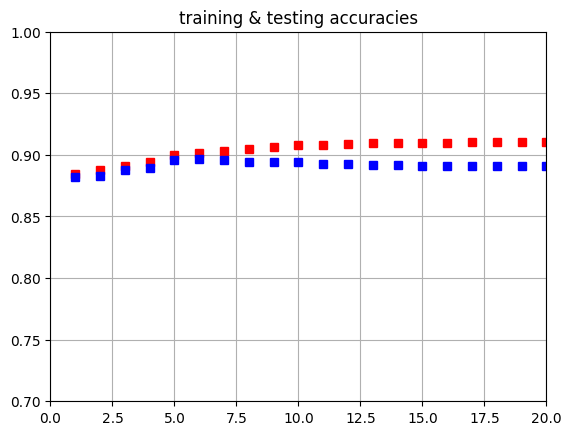

In [22]:
plt.axis([0, 20, 0.7, 1])
plt.grid()
plt.plot(max_depths, training_accuracies, 'rs', max_depths, testing_accuracies, 'bs')
plt.title('training & testing accuracies')
plt.show()

## D.7 Based on the plot, identify the following values:

*3 POINTS*

- maximum depth(s) for which the decision tree is underfitting
- maximum depth(s) for which the decision tree is overfitting
- optimal maximum depth according to you, and comment your decision

For each of the values, explain your choice. If you can't find one of these values, explain why you can't find it.

1. maximum depth(s) for which the decision tree is underfitting: 4

Why : The accuracy for the testing set keep growing when the depth is lower or equal to 4, this means that for these depths does no capture the best model yet and more accuracy can be reached for larger depth, we are thus underfitting.

2. maximum depth(s) for which the decision tree is overfitting: 8 (Not really visible here). 

Why : Normally it is  the depth at which the curve of accuracy starts to drop from its maximum; but here have set a limit of split with min_sample_split hence the curve stabilizes instead of dropping. We can to remove this limit to see more clearly the dropping: it is starting at 8

3. optimal maximum depth according to you, and comment your decision: 7 (Not really visible here).

Why : the same reasoning goes for the "Sweet spot". It is normally the region where accuracy_test and accuracy_traing start to split (one is going to 1, the other to 0 due to overfitting), but on the graphic is it not really visible, again because of the min_sample_split. We still see the split of test/training accuracy starting at 7; this is confirmed when we looked at the same graphic without min_sample_split

## D.8 Train a decision tree on the training sample

*1 POINT*

- using the optimal maximum depth identified in B.6
- using entropy to measure the quality of a split
- requiring at least 0.5% of the sample to split an internal node

In [25]:
%%time 

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=0.005)
clf_fit = clf.fit(features_train,target_train)

CPU times: total: 109 ms
Wall time: 210 ms


## D.9 Evaluate accuracy of this prediction

*1 POINT*

Print the result

In [25]:
# Print the answer here
print(clf_fit.score(features_test,target_test))

0.8956425569564256


# E. Support Vector Machine (SVM)

The second model we'll look into is the Support Vector Machine (SVM) model.

## E.1 Explain the concept of SVM and how it can be used to classify customers in the given dataset. Discuss the different kernel functions of SVM we saw in the course too.

*2 POINTS*

SVM is a supervised learning method that draws a boundary in the space of datapoints in order to classify them. This boundary can be linear (line or plane in multi-dimensions) or non linear (curve); it is determined by an objective function f(x) that depends on the features of the datapoint. The crucial property is the thickness (or margin) of this line/curve: to avoid overfitting, SVM try to fit the thickest (ith largest margin) line/curve possible that does not touch/include (training) datapoints. For the testing sets there are specific rules for classifying them once the line/curve with largest margin has been set.

Regarding our dataset, the one-hot encoding allows us to put every datapoints/record in a metric space

For non-linear SVM, the idea is to modify the space of data points to be able to still draw an hyperplane in the new space; this transformation is characterized by the Kernel functions. A well used kernell is for example the RBS (Gaussian kernel), as its name suggests it has a gaussian form; there is also the polynomial kernel.

## E.2 Train a non linear SVM on training sample

*1 POINT*

- with a penalty parameter C of 1
- a gamma value of 10

In [26]:
#DISCLAIMER: run time ~ 3min

svc = svm.SVC(kernel='rbf',C=1,gamma=10)
svc_fit = svc.fit(features_train,target_train)

In [27]:
svc_fit.score(features_test,target_test)

0.8817518248175182

## E.3 Comment processing time of training a non linear SVM on a sample of this size

*2 POINTS*

SVM  has high computational cost; even for the linear SVM, it is a convex quadratic problem ( with linear constraints). Training complexity of non linear SVM is generally between O(n^2) and O(n^3), in fact it is given by O(d.n^2) where d is the dimension (here d = len(variables)=24).
In our case, we have around 50k entries and it still takes 3min! This is really a lot, real databases have way more data that this, so SVM is not really an option...

# F. K-Nearest Neighbors (KNN)

## F.1 Explain the concept of KNN and how it can be used to classify customers in the given dataset.

*2 POINTS*

We need to imagine that every data point lie in a metric space, so that we can define different measure between them. The concept of kNN is quite simple: for every new instance, we look for its k-nearest neighbours (defined by the metric used) in the training set and we classify it by the label of the majority of neighbour.
With our given dataset, this is still a binary classification but there is a problem: implicitly, kNN algorithm rely on the underlying "density" of the data set, to accurately predict the label of a new instance based on the label of its knn. But here we have 24 dimensions, this is enormous; the number of datapoints needed for the dataset to be considered as "dense" goes exponentially. In this case 40k records is ridiculous compared to the 24 dimension, partly due to the one-hot encoding techniques: we should be carefull here we considering accuracy of this model !

## F.2 Train a k-nearest neighbors on training sample

*1 POINT*

- using 1 nearest neighbor

In [6]:
clf = KNeighborsClassifier(n_neighbors=1, p=2)  #Euclidean distance by default when p=2
clf_fit = clf.fit(features_train,target_train)

## F.3 Compute predictive accuracy on training and testing samples for the KNN with 1 nearest neighbor

*1 POINT*

In [9]:
print(clf_fit.score(features_train,target_train))
print(clf_fit.score(features_test,target_test))

1.0
0.8408316744083167


In [11]:
from sklearn.metrics import precision_score

In [15]:
clf_predict = clf.predict(features_test)
print(clf_predict)

[0 0 0 ... 0 1 0]


## F.4 Compare training and testing accuracies. What is the name of this phenomenon?

*1 POINT*

Overfitting

## F.5 Explain why training accuracy for a KNN with 1 nearest neighbor is high

*2 POINTS*

Of course accuracy on training give us perfectly 1, since the closest neighbour to an already know instance is this instance itlsef ! This is some kind of perfect overfitting. 

## F.6 Complete the following code to evaluate KNN predictive accuracy over complexity

*1 POINT*

- train several KNNs with number of nearest neighbors from 1 to 20
- compute both training and testing accuracies for each number of nearest neighbors and store them in lists

NB: this can take a long time (20 times the code in question F.2). Don't hesitate to print something in the "for" loop, so that you can see how the code moves forward.

In [16]:
kneighboors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
training_accuracies = []
testing_accuracies = []
training_precisions = []
testing_precisions = []

for index, kneighboor in enumerate(kneighboors, 1):
    clf = KNeighborsClassifier(n_neighbors=kneighboor, p=2)  #
    clf_fit = clf.fit(features_train,target_train)
    
    training_accuracy = clf_fit.score(features_train,target_train)
    training_accuracies.append(training_accuracy)
    training_predictions = clf.predict(features_train) 
    training_precision = precision_score(target_train,training_predictions)
    training_precisions.append(training_precision)

    testing_accuracy = clf_fit.score(features_test,target_test)
    testing_accuracies.append(testing_accuracy)
    test_predictions = clf.predict(features_test)
    test_precision = precision_score(target_test,test_predictions)
    testing_precisions.append(test_precision)

    print('Done: kneighboors = '+str(kneighboor)+'\n Test accuracy: '+ str(testing_accuracy)+'  Test Precision: '+ str(test_precision))

Done: kneighboors = 1
 Test accuracy: 0.8408316744083167  Test Precision: 0.3103731037310373
Done: kneighboors = 2
 Test accuracy: 0.8764875027648751  Test Precision: 0.413391557496361
Done: kneighboors = 3
 Test accuracy: 0.8674187126741871  Test Precision: 0.3896457765667575
Done: kneighboors = 4
 Test accuracy: 0.8788321167883212  Test Precision: 0.45272206303724927
Done: kneighboors = 5
 Test accuracy: 0.8748064587480646  Test Precision: 0.43528441879637264
Done: kneighboors = 6
 Test accuracy: 0.8813979208139792  Test Precision: 0.4945652173913043
Done: kneighboors = 7
 Test accuracy: 0.8788321167883212  Test Precision: 0.46972477064220186
Done: kneighboors = 8
 Test accuracy: 0.8816633488166334  Test Precision: 0.49859943977591037
Done: kneighboors = 9
 Test accuracy: 0.8794956867949568  Test Precision: 0.47389969293756395
Done: kneighboors = 10
 Test accuracy: 0.8829020128290201  Test Precision: 0.5182072829131653
Done: kneighboors = 11
 Test accuracy: 0.8824596328245963  Test P

**Run the following lines to plot training and testing accuracies over number of nearest neighbors**

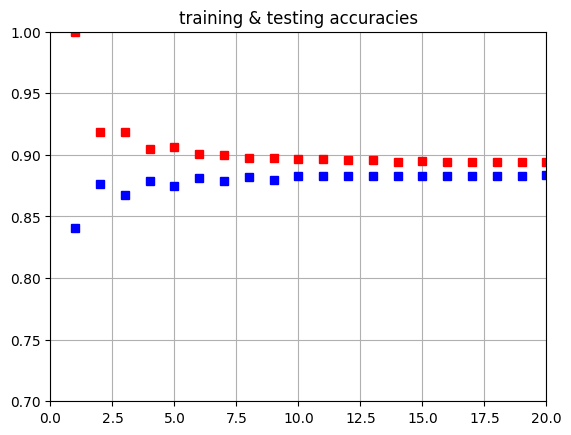

In [18]:
import matplotlib.pyplot as plt
plt.axis([0, 20, 0.7, 1])
plt.grid()
plt.plot(kneighboors, training_accuracies, 'rs', kneighboors, testing_accuracies, 'bs')
plt.title('training & testing accuracies')
plt.show()

## F.7 Based on the plot, identify the following values:

*3 POINTS*

- number of nearest neighbors for which the KNN is underfitting (if there is underfitting!)
- number of nearest neighbors for which the KNN is overfitting (if there is overfitting!)
- optimal number of nearest neighbors according to you, and comment on your decision

1. Underfitting: there is no underfitting here; that would be the case if we had a very large number of k-neighboor, nearly the same order as the size of the dataset. We would not capture any interesting feature since it would be like taking the average oof label over the all dataset, this is clearly underfitting

2. Overfitting: Not really easy to visually tell but between 1 and 9. For me these are the values for which the accuracy of the test is still growing (slighty for k = 7,8,9) and the accuracy of the training is dropping, before the two curves meet (the leaving of underfitting zone)

3. After having a look at the values we found that the maximum accuracy test is hit for k=19. Instead of blindly use this value, let us remark that in fact between k =10 and k=20 the accuracies are really close from each other ( = 0,883 +- 0,0005). The good thing to do in order to reduce the computational cost of the model is to choose the lowest k possible => less neighboor to check, less distances too calcualte, the bette for running time ! ==> WE CHOOSE K = 10

In [22]:
print(testing_accuracies.index(max(testing_accuracies)))
pprint(testing_accuracies)

19
[0.8408316744083167,
 0.8764875027648751,
 0.8674187126741871,
 0.8788321167883212,
 0.8748064587480646,
 0.8813979208139792,
 0.8788321167883212,
 0.8816633488166334,
 0.8794956867949568,
 0.8829020128290201,
 0.8824596328245963,
 0.8832116788321168,
 0.8828577748285777,
 0.8829020128290201,
 0.8828577748285777,
 0.8831674408316744,
 0.8830347268303472,
 0.8830347268303472,
 0.8829904888299049,
 0.8834771068347711]


## F.8 Train a KNN on the training sample

*1 POINT*

- using the optimal number of nearest neighbors identified in D.6

In [23]:
clf = KNeighborsClassifier(n_neighbors = 10, p=2)
clf_fit = clf.fit(features_train,target_train)

## F.9 Evaluate accuracy of this prediction

*1 POINT*

Print the result

In [24]:
clf_fit.score(features_test,target_test)

0.8829020128290201

# G. Model Comparison

Now that we created three different Machine Learning models, we need to decide which is the best one for our specific use-case.

## G.1 Compare decision tree, support vector machine and k-nearest neighbors classifiers on:

*4 POINTS*

- predictive accuracy (testing accuracy of optimal complexity)
- processing time ('affordable' or 'not affordable')
- ability to estimate class probability for a new observation ('yes', 'no')

**Decision tree classifiers**

- predictive accuracy: 0.8956425569564256
- processing time: affordable
- can output class probability: yes

**Support vector machine classifiers (non linear)**

- predictive accuracy: 0.8817518248175182
- processing time: not affordable
- can output class probability: no 

**K-nearest neighbors classifiers**

- predictive accuracy: 0.8829020128290201
- processing time: affordable
- can output class probability: yes

## G.2 Based on this comparaison, which classifier would you choose to estimate probability to subscribe to a term deposit? Explain your answer.

*2 POINTS*

## Choice : Decision Tree Classifier

The accuracies are quite close. However, non-linear SVM classifier has a very long processing time; our model is no more an option if we'd have a bigger database (and 40k record is not that big so...). We should eliminate this candidate

Because of the curse of dimensionality, one should be carefull about the kNN model: for 24 dimensions, only 40k data points is clearly not enough to be considered as 'dense' (Take only 10 datapoint/ unit of dimension to be considered as dense ==> we would need 10^24 record>>> 4.10^4 record)
This also translates into a bad score for the precision.
Finally **Decision Trees** seemed to be well suited for our dataset that is not too big; plus it can ouptut class probability => the **Winner**!

# H. Feature Importance

When you create Machine Learning models, it's often interesting to know what were the most important features to create the predictions. For a lot of Machine Learning models, it can be difficult to extract this feature importance, but not for Decision Trees. That's what you'll do in this section.

In Decision Trees, it's fairly easy to compute the features importance of a model. It means, the features that were the most important ones to predict well the output.

Please see the official documentation about features importance for Decision Trees in sklearn here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#:~:text=The%20importance%20of%20a%20feature,See%20sklearn.

The Python could be something like this:

```
clf = tree.DecisionTreeClassifier(...)
clf_fit = clf.fit(...)

print(clf_fit.feature_importances_)
```

**NB**: The feature importance outputs a list in the order of the features you gave in input (aka the "variables" variable you defined earlier). I know, it thus can be difficult to read. A solution can be to run this Python code:

```
for feature_imp, variable in zip(clf_fit.feature_importances_, variables):
  print(f"{variable}: {round(feature_imp*100, 1)}%")
```

## H.1 Compute feature importance for Decision Trees

*2 POINTS*

Use the optimal Decision Tree model trained in the **question D.8**

In [28]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=0.005)
clf_fit = clf.fit(features_train,target_train)

In [30]:
for feature_imp, variable in zip(clf_fit.feature_importances_, variables):
  print(f"{variable}: {round(feature_imp*100, 1)}%")

age: 6.6%
balance: 3.2%
campaign: 0.4%
default: 0.0%
duration: 58.9%
education_is_primary: 0.0%
education_is_secondary: 0.0%
education_is_tertiary: 0.2%
education_is_unknown: 0.0%
housing: 12.5%
job_is_employee: 0.0%
job_is_entrepreneur: 0.0%
job_is_manager: 0.1%
job_is_retired: 0.0%
job_is_student: 0.2%
job_is_unemployed: 0.0%
loan: 0.5%
marital_is_divorced: 0.0%
marital_is_married: 0.5%
marital_is_single: 0.0%
poutcome_is_failure: 4.1%
poutcome_is_success : 0.0%
poutcome_is_unknown: 0.2%
previous: 12.6%


## H.2 Reflect on the feature importance obtained. Do they align on your intuition and understanding of the marketing campaign dataset? If not, discuss possible reasons for the discrepancies.

*3 POINTS*

Duration is expected to be one of the most important feature, as it contains in some way part of the answer. What I mean is that if one client is not interested, he/she often hang up the phone call, as we people don't like to waste of time. On the contrary, people interested will make the call usually longer, to gather more info or listen to the arguments proposed by the bank. The chance of succes are way higher than before.
In short, they are intuitively highly correlated.
Age, Previous and Housing are also intuitively correct; the others are less and less significant so it's hard to tell.

However, I would have expected an non-negligible contribution of the status: employee, manager, etc... In my opinion, a student is less likely to make a deposit in the bank (as he/she has little money) compared to an employee for example. Some entrepreneur also do carry lots of cash in certain sector of activity: restaurant, shop owner, etc... they are probably more sensitive to this campaign!
I suspect that this lack of importance feature is due maybe to the hot encoding: it divided the data into  categories (of employment for ex) that are way too specific! It is hard to be predictive based on too precise features; otherwise it would be overfitting. Instead, one should have divided them into more relevant categories, that make more sense: is_employee, is_student, is_retired, or maybe depending on the average earning 
(student < xxx €) if the data allows it. Hot one encoding is not the only way to deal with categorical data !

# I. Communication & Critical Thinking

When you create Machine Learning models, the most important part is maybe when you communicate the results you got. You can use the best Machine Learning models possible; if you can't communicate the results well, you won't be able to create actionable insights out of this.

Another very important aspect of Machine Learning models is ethics: you can do a lot of things with Machine Learning, but are there ethical? It's crucial to always ask yourself about the ethical implications of the models you build.

## I.1 Imagine you need to explain the key results and insights from the Machine Learning models to non-technical stakeholders. How would you communicate the results in a clear, concise, and accessible manner?

*5 POINTS*

Our goal was to build predictive models that would give us profiles of customers likely to make deposits or not in the bank. To do this, we tested several supervised machine learning models. Simply put, supervised machine learning refers to a set of algorithms that allow a computer to learn to predict an outcome based on a set of predictors. In this case, we used data from previous telemarketing campaigns. In this data, for each previously called client, we have a series of information such as age, employment status, call duration, housing and more. These data are what we call predictors. We also know whether these clients made a deposit after the call, and this data is what we call the target variable, which is the data we are trying to predict.

Using automated procedures based on statistics and probabilities, the algorithm can leverage the dataset and provide us with a measurable accuracy of the probability that a certain type of client is likely or not to make a deposit. Specifically, we used a model called a decision tree, which allows us to determine with high accuracy (over 89%) the types of clients not interested in making a deposit. In a simplified manner, a decision tree is an algorithm that makes decisions based on the features of the data. It starts by selecting the best features and divides the data into subgroups based on that characteristic. In our case, it divides the data between clients who made a deposit after the call and those who did not. The algorithm then repeats this process with other characteristics until a stopping criterion is met. The tree can then be used to predict the class, in this case, whether the client will make a deposit or not, for a new sample by traversing the corresponding branches.

To predict this disinterest from a client, the model relies on features such as call duration, age, number of contacts performed before this campaign (for this client), and whether the client has a housing loan. Based on this, we can suggest not focusing future telemarketing efforts on certain types of clients who have a high probability (threshold to be defined, for example, 80%) of not making a deposit. This would represent a gain in time and resources.

However, to exclude certain customers from future marketing campaigns, it is important to ensure that the training data used to the model is representative and inclusive. Indeed, data collection is sometimes biased, some sub-populations are over-represented, others under-represented. This must be taken into account in order to avoid systemic biases in our model.


## I.2 How would you address the ethical implications of using Machine Learning algorithms in a marketing context? Did you think of any ethical aspects in this project? Consider aspects like fairness, accountability, and transparency.

*5 POINTS*

One should not forget that ML models don't have notion of ethics: they learn from our human's biais, without knowing it. It could favorize a certain portion of the data (based on gender/race ) at the expense of the others; this might be caused by the over-representation of a certain population group. At the end we would like our decision (to propose a service) to be based on "morally acceptable standard"; we should bride the model to avoid taking into account non-ethical criterias. This can be achieved trough the weighting of certain data elements, if we consider that they are not correctly represented from a statistical point of view. This way we could balance the dataset and start and ethical ML model.

In our context, we saw that some features weigh more in the model that others: this is the case of 'age'. Agism is a type of discrimation not accepted in our modern society; it is not fair to be miss a commericla offer because of your age. In the end, the ML model proposed sould not be affected by this ethical bias. Regarding accountability, the bank is responsible for any negative impacts this could cause, in terms of privacy, perpetuating harmful stereotypes. The bank needs to be transparent about the use of AI in marketing campaign, especially in the choice of the model and the solutions brought to ensure fairness and equity. This work must be done upstream, by carrying an ethic investigation in our model and in the diversity of the datasets, before the campaign. If the job is well done, there is nothing to worry about transparency: the model is guaranteed to be ethic and therefore is more likely to be morally accepted by the people concerned.